# Linear Algebra for AI and ML Assignment
### - Sourodeep Datta, 21CS10064

In [1]:
from mnist.loader import MNIST
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz

### Q1.

Loading the MNIST dataset

In [2]:
mndata = MNIST('./MNIST')
X_train, y_train = mndata.load_training()
X_test, y_test = mndata.load_testing()
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

Selecting Samples from class 1 and 7

In [3]:
indices_1_train = np.where(y_train == 1)[0]
indices_7_train = np.where(y_train == 7)[0]
indices_1_test = np.where(y_test == 1)[0]
indices_7_test = np.where(y_test == 7)[0]
X_train = np.concatenate((X_train[indices_1_train], X_train[indices_7_train]))
X_test = np.concatenate((X_test[indices_1_test], X_test[indices_7_test]))

Assigning Labels to picked classes

In [4]:
y_train = np.concatenate(([1]*len(indices_1_train), [-1]*len(indices_7_train)))
y_test = np.concatenate(([1]*len(indices_1_test), [-1]*len(indices_7_test)))

Calculating $x$ for Least Squares solution of $Ax = b$ with regularization parameter $\lambda$

In [5]:
Lambda = 0.0001
x = np.matmul(np.linalg.inv(np.matmul(X_train.T, X_train) + Lambda * np.identity(X_train.shape[1])), np.matmul(X_train.T, y_train))

Calculating Predictions

In [6]:
y_pred = np.matmul(X_test, x)
y_pred = np.sign(y_pred)

Finding Accuracy

In [7]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.9884419787332409


Calculating Confusion Matrix (with respect to class $1$)

In [8]:
confusion_matrix = np.zeros((2, 2))
for i in range(len(y_test)):
    if y_test[i] == 1 and y_pred[i] == 1:
        confusion_matrix[0][0] += 1
    elif y_test[i] == -1 and y_pred[i] == 1:
        confusion_matrix[0][1] += 1
    elif y_test[i] == 1 and y_pred[i] == -1:
        confusion_matrix[1][0] += 1
    elif y_test[i] == -1 and y_pred[i] == -1:
        confusion_matrix[1][1] += 1

print("Confusion Matrix: ")
print("True Positive: ", confusion_matrix[0][0], "False Positive: ", confusion_matrix[0][1])
print("False Negative: ", confusion_matrix[1][0], "True Negative: ", confusion_matrix[1][1])

Confusion Matrix: 
True Positive:  1133.0 False Positive:  23.0
False Negative:  2.0 True Negative:  1005.0


### Q2

Creating the datasets for the $10$ classifiers

In [9]:
X_train, y_train = mndata.load_training()
X_test, y_test = mndata.load_testing()
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train_list = []
y_train_list = []

for i in range(10):
    indices_i_train = np.where(y_train == i)[0]
    indices_i_test = np.where(y_test == i)[0]
    X_train_temp = X_train[indices_i_train]
    pos_examples = len(indices_i_train)
    neg_examples = pos_examples
    indices_neg = np.random.choice(np.where(y_train != i)[0], neg_examples)
    X_train_temp = np.concatenate((X_train_temp, X_train[indices_neg]))
    y_train_temp = np.concatenate(([1]*pos_examples, [-1]*neg_examples))
    X_train_list.append(X_train_temp)
    y_train_list.append(y_train_temp)

Training the $10$ classifiers and using them to make predictions on the test set

In [10]:
y_preds_list = []
for i in range(10):
    print("Training Classifier for Digit: ", i)
    x = np.matmul(np.linalg.inv(np.matmul(X_train_list[i].T, X_train_list[i]) + Lambda * np.identity(X_train_list[i].shape[1])), np.matmul(X_train_list[i].T, y_train_list[i]))
    y_pred = np.matmul(X_test, x)
    y_preds_list.append(y_pred)

Training Classifier for Digit:  0
Training Classifier for Digit:  1
Training Classifier for Digit:  2
Training Classifier for Digit:  3
Training Classifier for Digit:  4
Training Classifier for Digit:  5
Training Classifier for Digit:  6
Training Classifier for Digit:  7
Training Classifier for Digit:  8
Training Classifier for Digit:  9


Choosing the most likely prediction for each example in the test set

In [11]:
y_pred = np.zeros(len(y_test))
for i in range(len(y_test)):
    max_val = -float('inf')
    max_index = -1
    for j in range(10):
        if y_preds_list[j][i] > max_val:
            max_val = y_preds_list[j][i]
            max_index = j
    y_pred[i] = max_index

Calculating Accuracy

In [12]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.8715


Calculating Confusion Matrix

In [13]:
confusion_matrix = np.zeros((10, 10))
for i in range(len(y_test)):
    confusion_matrix[y_test[i]][int(y_pred[i])] += 1

#Print Confusion Matrix with appropriate labels alligned properly
print("Confusion Matrix: ")
confusion_matrix = confusion_matrix.astype(int)
print(confusion_matrix)

Confusion Matrix: 
[[ 912    1    7    0    3   24   16    2   13    2]
 [   0 1090    3    5    1    1    2    1   32    0]
 [  12   29  819   32   25   10   18   12   67    8]
 [   9    1   18  876    4   43    7    9   31   12]
 [   1    7    5    5  877    0    8    3   17   59]
 [  12   11    2   35    7  714   17   10   59   25]
 [  11    9    8    1   19   42  855    0   11    2]
 [   5   24   15   17   26    0    1  852    5   83]
 [   7   19    6   20   11   25   11   17  829   29]
 [  12    8    3   15   40    7    0   21   12  891]]


### Q3

Creating the vectors $p$ and $q$

In [14]:
p = np.random.uniform(-10, 10, 100)
q = np.random.uniform(-10, 10, 100)

Creating the vector $b$

In [15]:
b = p * q
b = np.where(b > 1, 1, -1)
print(b)

[-1  1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1  1
 -1  1 -1  1  1  1  1 -1 -1 -1  1 -1  1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1
 -1  1  1 -1  1 -1  1  1 -1 -1 -1  1 -1 -1  1 -1  1 -1  1  1 -1 -1 -1 -1
 -1  1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1  1  1  1  1
  1 -1  1 -1]


Creating the Matrix $A$

In [16]:
A = np.zeros((100, 6))
for i in range(100):
    A[i][0] = 1
    A[i][1] = p[i]
    A[i][2] = q[i]
    A[i][3] = p[i] ** 2
    A[i][4] = q[i] ** 2
    A[i][5] = p[i] * q[i]

Using Least Squares to find the best $x$ for the equation $Ax = b$

In [17]:
x = np.matmul(np.linalg.inv(np.matmul(A.T, A) + Lambda * np.identity(A.shape[1])), np.matmul(A.T, b))
print(x)

[-0.18489313 -0.01156744 -0.00140703  0.00248642 -0.00059205  0.0241854 ]


### Q4

Creating the vectors $p$ and $q$

In [18]:
p = np.random.uniform(-1, 1, 100)
q = np.random.uniform(-1, 1, 100)

Creating the vector $b$

In [19]:
b = p * q + p ** 2 + q ** 2
print(b)

[4.42854297e-01 8.19381077e-02 7.80851816e-01 9.21159020e-01
 3.26095658e-01 3.72965501e-01 6.32087950e-01 3.57975034e-02
 4.45139299e-01 4.02154775e-01 4.34462152e-01 7.67152548e-01
 8.86805022e-01 1.54814002e-01 8.10561788e-01 1.58532048e+00
 2.12573795e-01 2.39266602e-01 1.67815963e+00 6.33604669e-01
 9.08746031e-01 3.76890756e-01 6.31999189e-01 3.60953182e-01
 1.45623140e+00 6.90323298e-01 1.20864882e-01 2.89222794e-01
 4.94464799e-01 1.30441421e+00 2.61647012e-03 1.02968340e-01
 4.23783706e-01 2.46285614e-03 7.38920241e-01 5.07921801e-01
 5.54022562e-02 1.40732276e-02 3.23806284e-02 9.83539922e-01
 1.77453596e+00 2.67186268e-01 6.60928244e-01 6.76182492e-02
 2.07822293e-01 1.33276323e+00 6.62170878e-01 1.10103718e-01
 1.15861778e+00 4.69744280e-01 4.34863443e-01 3.84027890e-01
 2.32517352e-02 2.54042688e+00 1.39800524e+00 6.55490811e-02
 2.73029995e-01 1.63949345e-01 1.07345510e+00 1.96521697e-01
 4.31559795e-01 7.69798930e-01 4.69954481e-01 1.27559676e+00
 4.75318117e-01 9.137261

Creating the matrix $A$

In [20]:
A = np.zeros((100, 6))
for i in range(100):
    A[i][0] = 1
    A[i][1] = p[i]
    A[i][2] = q[i]
    A[i][3] = p[i] ** 2
    A[i][4] = q[i] ** 2
    A[i][5] = p[i] * q[i]

Using Least Squares to find the best $x$ for the equation $Ax = b$

In [21]:
x = np.matmul(np.linalg.inv(np.matmul(A.T, A) + Lambda * np.identity(A.shape[1])), np.matmul(A.T, b))
print(x)

[ 7.74389189e-06 -1.30325071e-06 -7.61919581e-07  9.99983268e-01
  9.99988984e-01  9.99986718e-01]


Calculating $MSE$

In [22]:
mse = np.zeros(100)
b_pred = np.matmul(A, x)
mse = np.sum((b_pred - b) ** 2) / 100
print('MSE: ', mse)

MSE:  4.10300682783642e-11


### Q5

Creating the vectors $p$

In [23]:
p = np.random.uniform(0, 1, 100)

Creating the vector $b$

In [24]:
b = 7 * p - 3 * p ** 2
print(b)

[3.73260213 1.70480199 3.95908767 2.06677252 3.89563683 1.11304711
 3.32694322 1.52266892 1.29181393 1.94341275 0.23909882 0.61037704
 3.91468114 2.70034776 1.88091001 3.99610663 2.43644197 3.63404974
 0.39840922 0.96772854 1.05984527 2.90583112 1.54752438 3.78190448
 3.71694804 1.05320933 1.98973675 0.61347114 2.86790309 3.95234051
 2.55797231 1.5273051  1.74109181 2.54608893 0.38437132 2.30758829
 2.75631545 2.24576668 1.30555361 2.75090503 3.91493201 0.26656969
 3.92760492 3.39609297 1.05535675 3.35051816 1.72450206 1.83807209
 0.36393279 3.96250974 2.54446314 3.1444182  2.48358355 0.31907
 0.25110049 3.44481643 0.79245544 3.45899274 3.70387999 3.22122477
 1.772841   1.49692947 0.95541978 1.22344752 2.13707524 3.0929304
 0.21606007 1.43531985 2.81605729 1.16750684 3.2964586  3.97872412
 1.84824751 3.18343075 0.69211465 1.82244584 0.11654297 3.93749227
 3.96646848 3.98318426 2.58878845 3.75336608 3.01883793 3.73282002
 3.64803928 3.79430713 1.6978213  3.92413927 1.15682664 2.66505321

### Part a

Creating the matrix $A$ for n = 10

In [25]:
n = 10
A = np.zeros((100, n))
for i in range(n):
    A[:, i] = 0
    left_pt = i / n
    right_pt = (i + 1) / n
    mid_pt = (left_pt + right_pt) / 2
    indices = np.where((p >= left_pt) & (p <= right_pt))[0]
    A[indices, i] = (right_pt - p[indices]) / (right_pt - mid_pt)
    A[indices, i] = np.where(A[indices, i] > 1, (p[indices] - left_pt) / (mid_pt - left_pt), A[indices, i]) 

Using Least Squares to find the best $x$ for the equation $Ax = b$

In [26]:
x = np.matmul(np.linalg.inv(np.matmul(A.T, A) + Lambda * np.identity(A.shape[1])), np.matmul(A.T, b))
print(x)

[ 0.43336238  1.428658    2.34840905  3.20440849  3.20329711  5.01347795
  5.03159522 10.86776711  5.2572859   5.87346625]


Calculating $MSE$

In [27]:
mse = np.zeros(100)
b_pred = np.matmul(A, x)
mse = np.sum((b_pred - b) ** 2) / 100
print('MSE: ', mse)

MSE:  1.3766414372278613


Creating the matrix $A$ for n = 50

In [28]:
n = 50
A = np.zeros((100, n))
for i in range(n):
    A[:, i] = 0
    left_pt = i / n
    right_pt = (i + 1) / n
    mid_pt = (left_pt + right_pt) / 2
    indices = np.where((p >= left_pt) & (p <= right_pt))[0]
    A[indices, i] = (right_pt - p[indices]) / (right_pt - mid_pt)
    A[indices, i] = np.where(A[indices, i] > 1, (p[indices] - left_pt) / (mid_pt - left_pt), A[indices, i]) 

Using Least Squares to find the best $x$ for the equation $Ax = b$

In [29]:
x = np.matmul(np.linalg.inv(np.matmul(A.T, A) + Lambda * np.identity(A.shape[1])), np.matmul(A.T, b))
print(x)

[  0.1481162    0.37008277   0.63080768   1.39559501   0.67663929
   2.3610125    0.           1.59811099   2.02125207   1.35049899
   3.54881782   2.38429873   2.84701346   3.802054     2.56382279
   2.49465466   2.66390185   3.04023696  17.47348119   6.49622218
   0.           4.99520478   2.96228788  29.71078972   3.50617207
   5.4450638    3.33771606 127.76163799   3.34978269   3.91126367
   4.8764821    3.42575022   6.01625075   5.67244866   4.22149741
   4.30594576   0.           0.          92.67260861   6.34323943
   4.93511912   7.69321378   4.71300352  45.08351017   0.
  11.23572012   4.9488938    7.6824111    5.54867761   9.61679784]


Calculating $MSE$

In [30]:
mse = np.zeros(100)
b_pred = np.matmul(A, x)
mse = np.sum((b_pred - b) ** 2) / 100
print('MSE: ', mse)

MSE:  1.0761977510699496


### Part b

Let the multiobjective least squares function be $J$. Then,
$$J  = J_1 + \lambda J_2$$
Where $J_1$ is the $\frac{1}{100}\sum_{i=1}^{100} (b_i - A_ix)^2$, where $A_i$ is the $i^{th}$ row of $A$ and $J_2$ is $\Vert{x}\Vert^{\tiny 2}_{\tiny 2}$.

Here we can write $J_1$ as $\frac{1}{100} \Vert{b - Ax}\Vert^{\tiny 2}_{\tiny 2} = \Vert{\frac{b}{\tiny 10} - \frac{A}{\tiny 10}x}\Vert^{\tiny 2}_{\tiny 2} = \Vert{b' - A'x}\Vert^{\tiny 2}_{\tiny 2}$. Thus, $J$ becomes,
$$J = \Vert{b' - A'x}\Vert^{\tiny 2}_{\tiny 2} + \lambda \Vert{x}\Vert^{\tiny 2}_{\tiny 2}$$
which has the solution,
$$x = (A'^TA' + \lambda I)^{-1}A'^Tb'$$

Sampling 5 random values of $\lambda$ from the range $(0, 0.2)$ 

In [31]:
lambdas = np.random.uniform(0, 0.2, 5)
print('Lambdas: ', lambdas)

Lambdas:  [0.13127422 0.09078731 0.19120073 0.03328107 0.03151993]


Creating the matrix $A$ and $A'$ for n = 150

In [32]:
n = 150
A = np.zeros((100, n))
for i in range(n):
    A[:, i] = 0
    left_pt = i / n
    right_pt = (i + 1) / n
    mid_pt = (left_pt + right_pt) / 2
    indices = np.where((p >= left_pt) & (p <= right_pt))[0]
    A[indices, i] = (right_pt - p[indices]) / (right_pt - mid_pt)
    A[indices, i] = np.where(A[indices, i] > 1, (p[indices] - left_pt) / (mid_pt - left_pt), A[indices, i]) 

A_prime = A / 10
b_prime = b / 10

Finding the best $x$ for each $\lambda$ to minimize $J$

In [33]:
x_list = []
for Lambda in lambdas:
    x = np.matmul(np.linalg.inv(np.matmul(A_prime.T, A_prime) + Lambda * np.identity(A_prime.shape[1])), np.matmul(A_prime.T, b_prime))
    mse = np.zeros(100)
    b_pred = np.matmul(A, x)
    mse = np.sum((b_pred - b) ** 2) / 100
    x_list.append(x)
    print('For Lambda: ', Lambda, ' MSE: ', mse)

For Lambda:  0.13127421568636488  MSE:  6.569134523123426
For Lambda:  0.09078731278532093  MSE:  6.37040671180696
For Lambda:  0.19120073239165744  MSE:  6.71914974778468
For Lambda:  0.03328106597220326  MSE:  5.498195537331433
For Lambda:  0.03151992739336223  MSE:  5.4363143786625905


In [34]:
for x in x_list:
    np.set_printoptions(precision=2)
    print('x: ', x)

x:  [0.   0.   0.01 0.   0.01 0.03 0.   0.   0.04 0.03 0.   0.   0.   0.06
 0.   0.05 0.   0.01 0.   0.   0.   0.02 0.02 0.06 0.14 0.04 0.03 0.02
 0.08 0.   0.12 0.   0.   0.   0.02 0.06 0.18 0.02 0.   0.   0.   0.17
 0.11 0.09 0.06 0.18 0.13 0.   0.09 0.09 0.   0.   0.01 0.   0.06 0.
 0.   0.13 0.   0.14 0.   0.   0.   0.05 0.   0.16 0.   0.28 0.02 0.05
 0.   0.06 0.   0.06 0.   0.11 0.02 0.2  0.   0.2  0.   0.01 0.   0.
 0.   0.16 0.   0.   0.09 0.   0.   0.04 0.07 0.   0.19 0.   0.   0.
 0.09 0.27 0.07 0.   0.   0.11 0.   0.1  0.21 0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.06 0.08 0.   0.   0.   0.19 0.23 0.3  0.   0.14
 0.   0.25 0.24 0.07 0.   0.   0.   0.   0.   0.   0.   0.27 0.   0.48
 0.38 0.04 0.   0.2  0.32 0.23 0.01 0.23 0.   0.41]
x:  [0.   0.   0.01 0.   0.01 0.04 0.   0.   0.05 0.04 0.   0.   0.   0.09
 0.   0.07 0.   0.02 0.   0.   0.   0.03 0.03 0.08 0.2  0.06 0.04 0.03
 0.11 0.   0.17 0.   0.   0.   0.02 0.09 0.25 0.03 0.   0.   0.   0.23
 0.16 0.13 0.09 0.26 0.18

Creating the matrix $A$ and $A'$ for n = 200

In [35]:
n = 200
A = np.zeros((100, n))
for i in range(n):
    A[:, i] = 0
    left_pt = i / n
    right_pt = (i + 1) / n
    mid_pt = (left_pt + right_pt) / 2
    indices = np.where((p >= left_pt) & (p <= right_pt))[0]
    A[indices, i] = (right_pt - p[indices]) / (right_pt - mid_pt)
    A[indices, i] = np.where(A[indices, i] > 1, (p[indices] - left_pt) / (mid_pt - left_pt), A[indices, i]) 

A_prime = A / 10
b_prime = b / 10

Finding the best $x$ for each $\lambda$ to minimize $J$

In [36]:
x_list = []
for Lambda in lambdas:
    x = np.matmul(np.linalg.inv(np.matmul(A_prime.T, A_prime) + Lambda * np.identity(A_prime.shape[1])), np.matmul(A_prime.T, b_prime))
    mse = np.zeros(100)
    b_pred = np.matmul(A, x)
    mse = np.sum((b_pred - b) ** 2) / 100
    x_list.append(x)
    print('For Lambda: ', Lambda, ' MSE: ', mse)

For Lambda:  0.13127421568636488  MSE:  6.780700534992438
For Lambda:  0.09078731278532093  MSE:  6.657907939550653
For Lambda:  0.19120073239165744  MSE:  6.871106532757642
For Lambda:  0.03328106597220326  MSE:  6.0731065215832345
For Lambda:  0.03151992739336223  MSE:  6.028445677437827


In [37]:
for x in x_list:
    np.set_printoptions(precision=2)
    print('x: ', x)

x:  [0.   0.   0.01 0.01 0.   0.   0.01 0.02 0.   0.01 0.02 0.03 0.02 0.
 0.   0.   0.   0.   0.04 0.   0.03 0.   0.   0.02 0.   0.   0.   0.
 0.   0.08 0.   0.03 0.17 0.   0.05 0.04 0.03 0.   0.01 0.   0.1  0.
 0.   0.   0.   0.09 0.   0.08 0.15 0.1  0.   0.   0.   0.   0.   0.07
 0.1  0.05 0.   0.08 0.16 0.01 0.   0.   0.12 0.   0.08 0.   0.   0.11
 0.   0.   0.08 0.   0.   0.   0.07 0.   0.   0.15 0.   0.   0.   0.
 0.   0.05 0.   0.11 0.   0.   0.2  0.   0.07 0.   0.   0.07 0.   0.18
 0.   0.   0.15 0.   0.16 0.14 0.   0.   0.17 0.   0.01 0.   0.   0.
 0.   0.   0.09 0.   0.   0.   0.19 0.   0.   0.2  0.   0.1  0.   0.
 0.06 0.   0.   0.   0.05 0.   0.2  0.   0.23 0.   0.   0.19 0.   0.
 0.   0.03 0.05 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.08 0.   0.08 0.   0.   0.   0.   0.11 0.24 0.05 0.   0.   0.
 0.   0.04 0.   0.14 0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.18 0.   0.08 0.15 0.29 0.   0.14 0.   0.26 0.21 0.2  0.   0.01
 0.12 0.   0.   0.19]


### Q6

Loading auto-regressive-data.csv and extracting the consumption data

In [44]:
df = pd.read_csv('auto-regressive-data.csv')
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [45]:
consumption = np.array(df.Consumption)
print(consumption.shape)

(4383,)


Creating the matrices $A$ and $b$. Ignoring the first 7 days of data in order to be able to make the lag variables. Also skipping the last day of data as we don't have the consumption data for the next day.

In [46]:
A = np.zeros((consumption.shape[0] - 1 - 7, 8))

for i in range(8):
    past_consumption = consumption[7 - i:consumption.shape[0] - 1 - i]
    A[:, i] = past_consumption

b = consumption[8:]

In [47]:
print(A.shape)

(4375, 8)


Using Least Squares to find the best $x$ for the equation $Ax = b$

In [58]:
Lambda = 0.0001
x = np.matmul(np.linalg.inv(np.matmul(A.T, A) + Lambda * np.identity(A.shape[1])), np.matmul(A.T, b))
print(x)

[ 0.65 -0.09  0.08 -0.04  0.    0.07  0.79 -0.48]


The $MSE$ for the training data is:

In [59]:
b_pred = np.matmul(A, x)
mse = np.sum((b_pred - b) ** 2) / (consumption.shape[0] - 1 - 7)
print('MSE: ', mse)

MSE:  4992.896553164592


### Q7

Taking one sample from the MNIST dataset

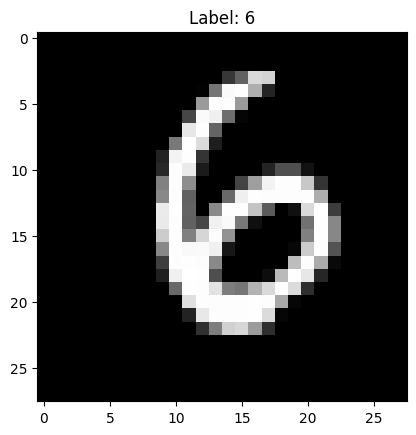

In [60]:
X_train, y_train = mndata.load_training()
image = np.array(X_train[218])
label = y_train[218]

plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title('Label: ' + str(label))
plt.show()

Creating the Gaussian Blur Kernel

In [61]:
K = [[1 / 16, 1 / 8, 1 / 16], [1 / 8, 1 / 4, 1 / 8], [1 / 16, 1 / 8, 1 / 16]]
K = np.array(K)
np.set_printoptions(precision=5)
print(K)

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


Creating the Toeplitz matrix $A$ of $K$. 

*[Reference](https://github.com/alisaaalehi/convolution_as_multiplication/tree/main)*

In [62]:
output_dim = (28 + K.shape[0] - 1, 28 + K.shape[1] - 1)
print(output_dim)

(30, 30)


In [63]:
#Making a padded K with the same dimensions as the output
padded_K = np.zeros(output_dim)
padded_K[output_dim[0] - K.shape[0]:, :K.shape[1]] = K

#Creating a toeplitz matrix for each row of the padded K, starting from the last row, having the same number of columns as the input image
toeplitz_matrices = []
for i in reversed(range(padded_K.shape[0])):
    c = padded_K[i]
    r = np.array([c[0]] + [0] * (28 - 1))
    toeplitz_matrices.append(toeplitz(c, r))

print('Shape of each toeplitz matrix: ', toeplitz_matrices[0].shape)

#Creating a doubly blocked toeplitz matrix from the generated toeplitz matrices having the same number of columns as the input image
doubly_blocked_toeplitz = np.zeros((30 * 30, 28 * 28))
for i in range(30):
    for j in range(28):
        if i - j >= 0:
            doubly_blocked_toeplitz[i * 30: (i + 1) * 30, j * 28 : (j + 1) * 28] = toeplitz_matrices[i - j]

print('Shape of doubly blocked toeplitz matrix: ', doubly_blocked_toeplitz.shape)
np. set_printoptions(threshold=np. inf)
np.set_printoptions(linewidth=np.inf)
print('A small sample of the doubly blocked toeplitz matrix: ')
print(doubly_blocked_toeplitz[:20, :20])

Shape of each toeplitz matrix:  (30, 28)
Shape of doubly blocked toeplitz matrix:  (900, 784)
A small sample of the doubly blocked toeplitz matrix: 
[[0.0625 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.125  0.0625 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.0625 0.125  0.0625 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.0625 0.125  0.0625 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.0625 0.125  0.0625 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.0625 0.125  0.0625 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0

Creating the blurred image $y$

(900,)


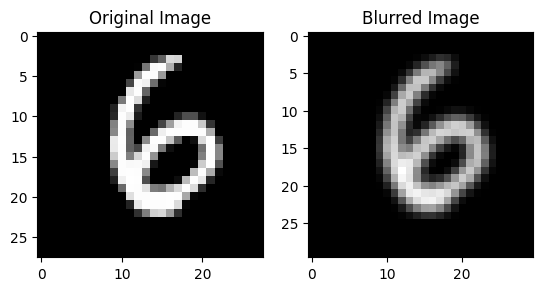

In [64]:
y = np.dot(doubly_blocked_toeplitz, image)
print(y.shape)

#Compare original image with blurred image side by side
plt.subplot(1, 2, 1)
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(y.reshape(30, 30), cmap='gray')
plt.title('Blurred Image')
plt.show()

Creating the matrix $D_h$

In [65]:
D_h = np.zeros((27 * 28, 28 * 28))
I = np.identity(28)
for i in range(27):
    D_h[i * 28 : (i + 1) * 28, i * 28 : (i + 1) * 28] = -I
    D_h[i * 28 : (i + 1) * 28, (i + 1) * 28 : (i + 2) * 28] = I

Creating the matrix $D_v$

In [66]:
D_v = np.zeros((27 * 28 * 28, 28 * 28))
D = np.zeros((27, 28))
for i in range(27):
    D[i, i] = -1
    D[i, i + 1] = 1
for i in range(28):
    D_v[i * 27 : (i + 1) * 27, i * 28 : (i + 1) * 28] = D

Finding the best $\hat{x}$ to minimize the equation $J = \Vert{y - A\hat{x}}\Vert^{\tiny 2}_{\tiny 2} + \lambda \Vert{D_h\hat{x}}\Vert^{\tiny 2}_{\tiny 2} + \lambda \Vert{D_v\hat{x}}\Vert^{\tiny 2}_{\tiny 2}$ in order to deblur the image.
The solution is given by,
$$\hat{x} = (A^TA + \lambda D_h^TD_h + \lambda D_v^TD_v)^{-1}A^Ty$$

In [67]:
Lambda = 0.007
x_hat = np.matmul(np.linalg.inv(np.matmul(doubly_blocked_toeplitz.T, doubly_blocked_toeplitz) + Lambda * np.matmul(D_h.T, D_h) + Lambda * np.matmul(D_v.T, D_v)), np.matmul(doubly_blocked_toeplitz.T, y))
print(x_hat.shape)

(784,)


Comparing the original, blurred and deblurred image

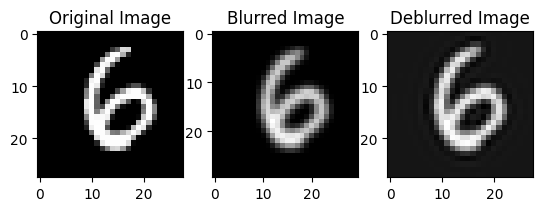

In [68]:
#Compare original image, blurred image and deblurred image side by side
plt.subplot(1, 3, 1)
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(y.reshape(30, 30), cmap='gray')
plt.title('Blurred Image')
plt.subplot(1, 3, 3)
plt.imshow(x_hat.reshape(28, 28), cmap='gray')
plt.title('Deblurred Image')
plt.show()

### Q8

Creating the vectors $p$ and $q$

In [69]:
p = np.random.uniform(-1, 1, 100)
q = np.random.uniform(-1, 1, 100)

Creating the vector $b$

In [70]:
b = p * q + p ** 2 + q ** 2
print(b)

[0.7763  0.11109 0.14378 0.10165 1.30514 0.35239 1.84978 1.52493 0.85092 0.57042 0.1938  0.13944 0.83391 0.925   1.10477 0.49693 1.91256 0.70125 0.10968 1.23712 0.35234 0.78947 0.68632 0.28618 0.05872 0.17743 1.48386 0.11868 1.60658 0.06927 0.0081  0.56346 0.64482 0.16622 0.75609 0.60105 1.6193  0.89238 0.13306 1.52054 1.6768  0.59828 0.72704 0.40609 0.23379 1.26491 0.80168 0.65195 0.35211 1.47131 0.12343 0.19616 0.26447 1.14449 0.90867 0.46483 0.81423 0.54991 0.35782 0.74612 0.39956 0.40706 0.32833 0.83168 0.98456 0.02874 0.49451 0.80767 1.62495 0.06546 0.43511 1.41919 1.75945 0.65236 1.61224 0.75302 0.21086 0.67465 0.93908 0.32997 0.61062 0.32193 0.46142 0.04576 2.14567 0.00507 0.66314 0.67188 1.8116  0.06358 0.21042 0.63348 0.227   0.47612 1.63984 2.26347 0.46935 1.18736 1.13785 0.4161 ]


Creating the matrix $A$

In [71]:
A = np.zeros((100, 6))
for i in range(100):
    A[i][0] = 1
    A[i][1] = p[i]
    A[i][2] = q[i]
    A[i][3] = p[i] ** 2
    A[i][4] = q[i] ** 2
    A[i][5] = p[i] * q[i]

Finding the Least Squares solution for $Ax = b$ using Gradient Descent

In [72]:
x = np.random.uniform(-1, 1, 6)
x = x.reshape(6, 1)
b = b.reshape(100, 1)
for i in range(10000):
    #Forward Pass:
    b_pred = np.matmul(A, x)
    #Backward Pass:
    x = x - 0.1 / A.shape[0] * np.matmul((b_pred - b).T, A).T

The vector $x$ is:

In [73]:
print(x)

[[ 4.02684e-15]
 [ 1.99251e-16]
 [-4.95367e-16]
 [ 1.00000e+00]
 [ 1.00000e+00]
 [ 1.00000e+00]]


The $MSE$ found is:

In [74]:
b_pred = np.matmul(A, x)
mse = np.sum((b_pred - b) ** 2) / 100
print('MSE: ', mse)

MSE:  1.6978252513161596e-29


### Q9

Getting the data

In [75]:
df = pd.read_csv('assignment9_data.csv')
print(df.head())

          t          b
0  1.786011  11.711581
1  2.962026  44.862219
2  0.614960   2.533295
3  2.962919  44.888936
4  0.380318   3.003687


Partitioning the data into intervals of $[0, 1]$, $[1, 2]$ and $[2, 3]$ 

In [76]:
data_01 = df[df['t'] <= 1].reset_index(drop=True)
data_12 = df[(df['t'] > 1) & (df['t'] <= 2)].reset_index(drop=True)
data_23 = df[(df['t'] > 2) & (df['t'] <= 3)].reset_index(drop=True)

Let $f_1$, $f_2$ and $f_3$ be $$f_{\tiny 1} = a_{\tiny 2}x^2 + a_{\tiny 1}x + a_{\tiny 0}$$
$$f_{\tiny 2} = b_{\tiny 3}x^3 + b_{\tiny 2}x^2 + b_{\tiny 1}x + b_{\tiny 0}$$
$$f_{\tiny 3} = c_{\tiny 2}x^2 + c_{\tiny 1}x + c_{\tiny 0}$$
Then $\hat{x}$ is,
$$\hat{x} = \begin{bmatrix}a_{\tiny 2}\\a_{\tiny 1}\\a_{\tiny 0}\\b_{\tiny 3}\\b_{\tiny 2}\\b_{\tiny 1}\\b_{\tiny 0}\\c_{\tiny 2}\\c_{\tiny 1}\\c_{\tiny 0}\end{bmatrix}$$
and $A$ is,
$$A = \begin{bmatrix}x_1^2 & x_1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\x_2^2 & x_2 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\x_3^2 & x_3 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\0 & 0 & 0 & 0 & 0 & 0 & 0 & x_{\tiny m - 2}^2 & x_{\tiny m - 2} & 1\\0 & 0 & 0 & 0 & 0 & 0 & 0 & x_{\tiny m - 1}^2 & x_{\tiny m - 1} & 1\\0 & 0 & 0 & 0 & 0 & 0 & 0 & x_{\tiny m}^2 & x_{\tiny m} & 1\end{bmatrix}$$

In [77]:
A = np.zeros((len(df), 10))
for i in range(50):
    A[i, 0] = data_01['t'][i] ** 2
    A[i, 1] = data_01['t'][i]
    A[i, 2] = 1
for i in range(50, 100):
    A[i, 3] = data_12['t'][i - 50] ** 3
    A[i, 4] = data_12['t'][i - 50] ** 2
    A[i, 5] = data_12['t'][i - 50]
    A[i, 6] = 1
for i in range(100, 150):
    A[i, 7] = data_23['t'][i - 100] ** 2
    A[i, 8] = data_23['t'][i - 100]
    A[i, 9] = 1

b = np.zeros((len(df), 1))
for i in range(50):
    b[i] = data_01['b'][i]
for i in range(50, 100):
    b[i] = data_12['b'][i - 50]
for i in range(100, 150):
    b[i] = data_23['b'][i - 100]

Given that $$f_1(1) = f_2(1)$$ $$f_2(2) = f_3(2)$$ $$f'_2(2) = f'_3(2)$$
which is equivalent to:
$$a_{\tiny 2} + a_{\tiny 1} + a_{\tiny 0} = b_{\tiny 3} + b_{\tiny 2} + b_{\tiny 1} + b_{\tiny 0}$$
$$8b_{\tiny 3} + 4b_{\tiny 2} + 2b_{\tiny 1} + b_{\tiny 0} = 4c_{\tiny 2} + 2c_{\tiny 1} + c_{\tiny 0}$$
$$12b_{\tiny 3} + 4b_{\tiny 2} + b_{\tiny 1} = 4c_{\tiny 2} + c_{\tiny 1}$$
which is equivalent to:
$$a_{\tiny 2} + a_{\tiny 1} + a_{\tiny 0} - b_{\tiny 3} - b_{\tiny 2} - b_{\tiny 1} - b_{\tiny 0} = 0$$
$$4c_{\tiny 2} + 2c_{\tiny 1} + c_{\tiny 0} - 8b_{\tiny 3} - 4b_{\tiny 2} - 2b_{\tiny 1} - b_{\tiny 0} = 0$$
$$4c_{\tiny 2} + c_{\tiny 1} - 12b_{\tiny 3} - 4b_{\tiny 2} - b_{\tiny 1} = 0$$
Thus, the matrix $C$ becomes,
$$C = \begin{bmatrix}1 & 1 & 1 & -1 & -1 & -1 & -1 & 0 & 0 & 0\\0 & 0 & 0 & -8 & -4 & -2 & -1 & 4 & 2 & 1\\0 & 0 & 0 & -12 & -4 & -1 & 0 & 4 & 1 & 0\end{bmatrix}$$
and $d$ is:
$$d = \begin{bmatrix}0\\0\\0\end{bmatrix}$$

In [78]:
C = np.array([[1, 1, 1, -1, -1, -1, -1, 0, 0, 0], [0, 0, 0, -8, -4, -2, -1, 4, 2, 1], [0, 0, 0, -12, -4, -1, 0, 4, 1, 0]])
d = np.array([0, 0, 0])

Thus, the KKT Matrix is:
$$\begin{bmatrix}2A^TA & C^T\\C & 0\end{bmatrix}$$

In [79]:
KKT = np.zeros((13, 13))
KKT[:10, :10] = 2 * np.matmul(A.T, A)
KKT[:10, 10:] = C.T
KKT[10:, :10] = C

The solution to the system of equations is:
$$\begin{bmatrix}\hat{x} \\ \hat{z}\end{bmatrix} = \begin{bmatrix}2A^TA & C^T\\C & 0\end{bmatrix}^{-1}\begin{bmatrix}2A^Tb\\d\end{bmatrix}$$

In [80]:
soln = np.matmul(np.linalg.inv(KKT), np.concatenate((2 * np.matmul(A.T, b), d.reshape(3, 1))))
x_hat = soln[:10]
print(x_hat)

[[ 1.00000e+00]
 [-3.00000e+00]
 [ 4.00000e+00]
 [ 3.00000e+00]
 [-2.00000e+00]
 [ 2.76486e-10]
 [ 1.00000e+00]
 [ 1.00000e+00]
 [ 2.40000e+01]
 [-3.50000e+01]]


The resulting equations of $f_1$, $f_2$ and $f_3$ are:
$$f_{\tiny 1} = x^2 -3x + 4$$
$$f_{\tiny 2} = 3x^3 - 2x^2 + 1$$
$$f_{\tiny 3} = x^2 + 24x - 35$$

Note: Taking $2.76486*10^{-10}$ to be equivalent to $0$